#Importing Libraries and Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#data manipulation
import numpy as np
import pandas as pd
import seaborn as sns
import tqdm
#file and system operations
import os
import sys
assert sys.version_info >= (3,5)
#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#consistent sized plots
from pylab import rcParams
rcParams['figure.figsize']=12,5
rcParams['axes.labelsize']=12
rcParams['ytick.labelsize']=12
rcParams['xtick.labelsize']=12
#handle unwanted warnings 
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)
#view all the columns
pd.options.display.max_columns = None
#basic text manipulation libraries
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
full_data = pd.read_csv('/content/drive/MyDrive/Project DC/playstorescrapping.csv')
full_data.head()

,content,thumbsUpCount,score,at,app
0,"Worst service, paid bill and app deducted plat...",1,1,2022-07-17 12:56:14,Paytm: Secure UPI Payments
1,Paytm wallet frozen. I have added money to it ...,0,1,2022-07-17 12:10:49,Paytm: Secure UPI Payments
2,Psytm is doing fraud with the customer. They t...,0,1,2022-07-17 11:16:07,Paytm: Secure UPI Payments
3,It's a very good app for paying bills but rece...,2,2,2022-07-17 09:45:58,Paytm: Secure UPI Payments
4,Everything is good about the app but have one ...,0,5,2022-07-17 07:57:17,Paytm: Secure UPI Payments


In [ ]:
full_data.rename(columns = {'app':'appname'}, inplace = True)
full_data.head()

,content,thumbsUpCount,score,at,appname
0,"Worst service, paid bill and app deducted plat...",1,1,2022-07-17 12:56:14,Paytm: Secure UPI Payments
1,Paytm wallet frozen. I have added money to it ...,0,1,2022-07-17 12:10:49,Paytm: Secure UPI Payments
2,Psytm is doing fraud with the customer. They t...,0,1,2022-07-17 11:16:07,Paytm: Secure UPI Payments
3,It's a very good app for paying bills but rece...,2,2,2022-07-17 09:45:58,Paytm: Secure UPI Payments
4,Everything is good about the app but have one ...,0,5,2022-07-17 07:57:17,Paytm: Secure UPI Payments


In [ ]:
full_data['appname'].unique()

array(['Paytm: Secure UPI Payments', 'Google Pay :Secure UPI payment',
       'PhonePe UPI, Payment, Recharge', 'BHIM - MAKING INDIA CASHLESS',
       'MobiKwik- UPI, Bills, PayLater',
       'Paytm for Business: Accept Payments for Merchants',
       'Freecharge - Pay Later, UPI', 'PayPal - Send, Shop, Manage',
       'Payzapp - UPI & Bill Payments', 'Samsung Wallet (Samsung Pay)',
       'Yuva Pay:UPI, Wallet, Payments', 'Money Transfer, BHIM UPI',
       'Google Pay for Business', 'iMobile Pay by ICICI Bank',
       'PhonePe Business', 'Fyp- Payment App for Teens',
       'Skrill - Pay & Transfer Money', 'BharatPe for Merchants',
       'BHIM SBI Pay:Retail & Business', 'muvin: Teenagers Payment App',
       'BHIM YES PAY - UPI, Wallet, Recharge, Bharat QR',
       'Airtel Thanks – Recharge & UPI', 'F-Pay, Wallet to Bank Transfer',
       'Razorpay Payments for Business', 'Ola Money - Wallet payments',
       'Bill Payment & Recharge,Wallet', 'CRED: Credit Card Bills & More',
      

# Full-category Topic Modelling

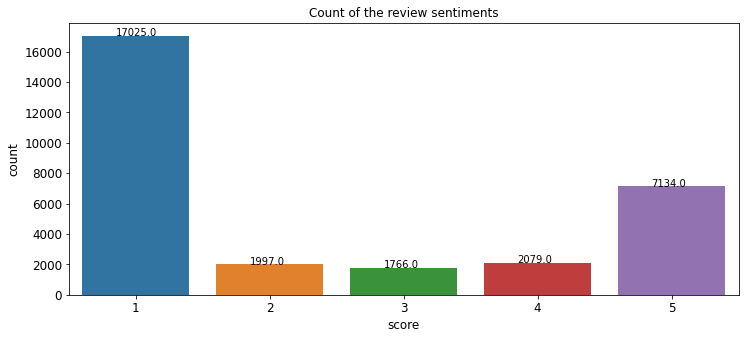

In [ ]:
ax=sns.countplot(full_data['score'])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title('Count of the review sentiments')
plt.show()

In [ ]:
import gensim

stemmer = SnowballStemmer('english')

def lemmatize_stemming(text):
 
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='n'))

def preprocess(text):
    
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [ ]:
processed_docs = []

for doc in full_data['content']:
    processed_docs.append(preprocess(doc))

In [ ]:
dictionary = gensim.corpora.Dictionary(processed_docs)

In [ ]:
dictionary.filter_extremes(no_below=5,no_above=0.1,keep_n=None)

In [ ]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [ ]:
seed = 41
lda_model = gensim.models.LdaMulticore(corpus=bow_corpus,num_topics=6,id2word=dictionary,passes=10,workers=2,
                                      random_state=seed,minimum_probability=0.05)

In [ ]:
for idx,topic in lda_model.print_topics(-1,num_words=8):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.022*"option" + 0.022*"busi" + 0.015*"paytm" + 0.014*"airtel" + 0.014*"like" + 0.012*"support" + 0.012*"problem" + 0.011*"chang"


Topic: 1 
Words: 0.035*"easi" + 0.030*"best" + 0.029*"great" + 0.023*"nice" + 0.022*"applic" + 0.022*"featur" + 0.021*"like" + 0.021*"user"


Topic: 2 
Words: 0.027*"credit" + 0.027*"support" + 0.025*"day" + 0.021*"cred" + 0.019*"care" + 0.019*"refund" + 0.014*"receiv" + 0.013*"stripe"


Topic: 3 
Words: 0.057*"wallet" + 0.042*"recharg" + 0.033*"cashback" + 0.027*"credit" + 0.025*"offer" + 0.023*"reward" + 0.016*"ad" + 0.015*"cred"


Topic: 4 
Words: 0.058*"updat" + 0.029*"open" + 0.025*"show" + 0.019*"problem" + 0.018*"error" + 0.016*"version" + 0.012*"check" + 0.012*"notif"


Topic: 5 
Words: 0.034*"mobil" + 0.033*"number" + 0.021*"tri" + 0.021*"regist" + 0.021*"verifi" + 0.019*"send" + 0.019*"unabl" + 0.017*"abl"




### Topics



1. Negative Review: Support related issues.(non-technical)
2. Positive Review: Easy transactions and User friendly interface.(technical)
3. Negative Review: Support related issues.(non-technical)
4. Positive Review: Many features(technical)
5. Negative Review: Update issues(technical)
6. Negative Revew: Login and Authentication issues.(technical)











# FUNCTION DEFINITIONS

loading the data of a particular app

In [ ]:
def load_app_csv(app):
  for (appname), group in full_data.groupby(['appname']):
     group.to_csv(f'{appname}.csv', index=False)
 
  data = pd.read_csv(f'{app}.csv')
  return data


plotting the graph of a particular app

In [ ]:

def graph(appname):
  data = load_app_csv(appname)
  ax=sns.countplot(data['score'])
  for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
  plt.title(f'Count of the review sentiments for {appname} app')
  plt.show()

Preprocessing of apps

In [ ]:
def preprocess(data):
  import gensim

  stemmer = SnowballStemmer('english')

  def lemmatize_stemming(text):
  
      return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='n'))

  def preprocess(text):
      
      result = []
      for token in gensim.utils.simple_preprocess(text):
          if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
              result.append(lemmatize_stemming(token))
      return result

  processed_docs = []

  for doc in data['content']:
      processed_docs.append(preprocess(doc))
      
  return processed_docs


model training

In [ ]:
def lda(appname):
  data = load_app_csv(appname)
  pre = preprocess(data)
  dictionary = gensim.corpora.Dictionary(pre)
  dictionary.filter_extremes(no_below=5,no_above=0.1,keep_n=None)
  bow_corpus = [dictionary.doc2bow(doc) for doc in pre]

  seed = 41
  lda_model = gensim.models.LdaMulticore(corpus=bow_corpus,num_topics=6,id2word=dictionary,passes=10,workers=2,
                                      random_state=seed,minimum_probability=0.05)
  
  for idx,topic in lda_model.print_topics(-1,num_words=8):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

# APP WISE TOPIC MODELING

In [ ]:
applist=['Paytm: Secure UPI Payments','Google Pay :Secure UPI payment','PhonePe UPI, Payment, Recharge','BHIM - MAKING INDIA CASHLESS','MobiKwik- UPI, Bills, PayLater',
       'Paytm for Business: Accept Payments for Merchants','Freecharge - Pay Later, UPI', 'PayPal - Send, Shop, Manage', 'Payzapp - UPI & Bill Payments', 'Samsung Wallet (Samsung Pay)',
       'Yuva Pay:UPI, Wallet, Payments', 'Money Transfer, BHIM UPI','Google Pay for Business', 'iMobile Pay by ICICI Bank','PhonePe Business', 'Fyp- Payment App for Teens',
       'Skrill - Pay & Transfer Money', 'BharatPe for Merchants', 'BHIM SBI Pay:Retail & Business', 'muvin: Teenagers Payment App','BHIM YES PAY - UPI, Wallet, Recharge, Bharat QR',
       'Airtel Thanks – Recharge & UPI', 'F-Pay, Wallet to Bank Transfer','Razorpay Payments for Business', 'Ola Money - Wallet payments','Bill Payment & Recharge,Wallet', 'CRED: Credit Card Bills & More',
       'Stripe Dashboard', 'Fave - Cashback, Deals, UPI','BHIM Axis Pay:UPI,Online Recharge & Money Transfer']

## 1)Paytm: Secure UPI Payments

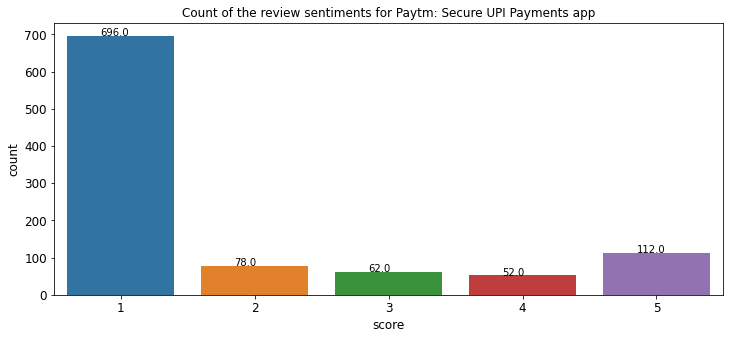

In [ ]:
graph(applist[0])

In [ ]:
lda(applist[0])

Topic: 0 
Words: 0.044*"recharg" + 0.021*"mobil" + 0.018*"start" + 0.016*"year" + 0.013*"make" + 0.012*"phone" + 0.012*"know" + 0.011*"transfer"


Topic: 1 
Words: 0.029*"cashback" + 0.019*"provid" + 0.017*"login" + 0.016*"request" + 0.015*"send" + 0.014*"easi" + 0.014*"receiv" + 0.013*"applic"


Topic: 2 
Words: 0.037*"ticket" + 0.026*"book" + 0.022*"cancel" + 0.016*"connect" + 0.015*"abl" + 0.014*"deduct" + 0.013*"ask" + 0.013*"notif"


Topic: 3 
Words: 0.032*"refund" + 0.022*"credit" + 0.019*"fail" + 0.018*"ticket" + 0.017*"month" + 0.016*"paid" + 0.016*"loan" + 0.015*"respons"


Topic: 4 
Words: 0.028*"face" + 0.016*"close" + 0.016*"activ" + 0.016*"balanc" + 0.015*"check" + 0.014*"resolv" + 0.014*"abl" + 0.013*"credit"


Topic: 5 
Words: 0.027*"card" + 0.026*"offer" + 0.024*"cashback" + 0.020*"number" + 0.018*"chang" + 0.017*"useless" + 0.015*"cash" + 0.015*"like"




### Topics


1.   Negative Review:Payment Issues.(technical)
2.   Positive Review: Provides good offers and easy money transfer(non-technical)
3.  Negative Review:Payment issues and no notification.(technical)
4. Negative Review:Payment issues,Refund failed and Notifications are not being recieved(technical)
5. Positive review: Convenient service.(technical)
6. Negative Review:Data lost after changing phone number.(technical)









## 2)Google Pay :Secure UPI payment

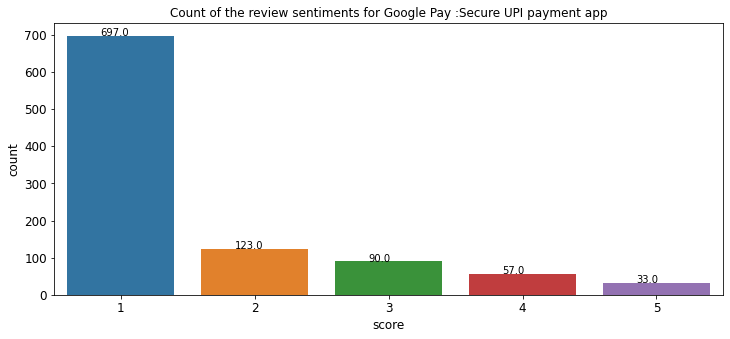

In [ ]:
graph(applist[1])

In [ ]:
lda(applist[1])

Topic: 0 
Words: 0.023*"credit" + 0.018*"contact" + 0.016*"option" + 0.015*"debit" + 0.014*"servic" + 0.013*"experi" + 0.011*"wallet" + 0.011*"ticket"


Topic: 1 
Words: 0.051*"reward" + 0.038*"better" + 0.026*"cashback" + 0.024*"complet" + 0.022*"coupon" + 0.018*"useless" + 0.017*"luck" + 0.015*"give"


Topic: 2 
Words: 0.034*"open" + 0.019*"help" + 0.018*"unabl" + 0.018*"messag" + 0.018*"face" + 0.016*"notif" + 0.016*"check" + 0.016*"error"


Topic: 3 
Words: 0.031*"support" + 0.023*"applic" + 0.022*"open" + 0.018*"process" + 0.014*"help" + 0.012*"uninstal" + 0.012*"slow" + 0.011*"long"


Topic: 4 
Words: 0.021*"abl" + 0.020*"connect" + 0.019*"internet" + 0.019*"wrong" + 0.017*"went" + 0.015*"error" + 0.015*"server" + 0.013*"send"


Topic: 5 
Words: 0.027*"debit" + 0.023*"refund" + 0.019*"stuck" + 0.019*"receiv" + 0.019*"experi" + 0.018*"deduct" + 0.018*"transfer" + 0.014*"care"




### Topics



1.  Positive Review: Easy transactions and bill payments.(technical)
2.  Negative Review: Rewards are useless.(technical)
3. Negative Review: Help related issues.(non-technical)
4. Negative Review: Support related issues and Slow Installation.(technical)
5. Negative Review: Connection related issues.(technical)
6. Negative Revew: Payment Issues.(technical)











## 3)PhonePe UPI, Payment, Recharge

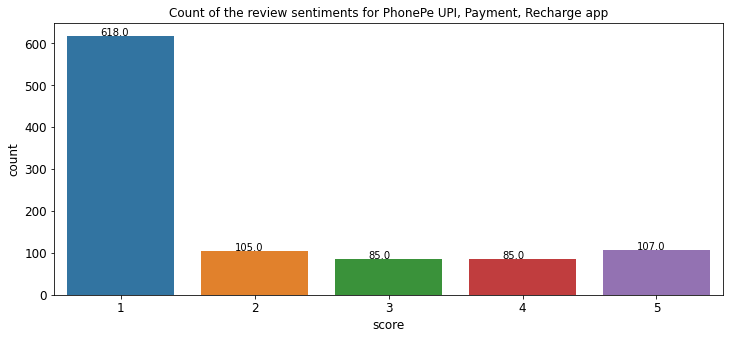

In [ ]:
graph(applist[2])

In [ ]:
lda(applist[2])

Topic: 0 
Words: 0.041*"wallet" + 0.021*"get" + 0.016*"want" + 0.016*"check" + 0.016*"thing" + 0.014*"best" + 0.014*"need" + 0.014*"gpay"


Topic: 1 
Words: 0.060*"recharg" + 0.031*"easi" + 0.029*"mobil" + 0.023*"charg" + 0.021*"user" + 0.020*"check" + 0.017*"extra" + 0.017*"technic"


Topic: 2 
Words: 0.049*"open" + 0.031*"wallet" + 0.020*"close" + 0.016*"help" + 0.016*"ticket" + 0.016*"experi" + 0.014*"tri" + 0.014*"abl"


Topic: 3 
Words: 0.025*"credit" + 0.025*"receiv" + 0.025*"servic" + 0.023*"process" + 0.022*"debit" + 0.019*"ticket" + 0.019*"send" + 0.018*"support"


Topic: 4 
Words: 0.031*"unabl" + 0.030*"contact" + 0.024*"check" + 0.023*"fail" + 0.020*"refund" + 0.016*"abl" + 0.015*"tri" + 0.013*"wrong"


Topic: 5 
Words: 0.036*"reward" + 0.029*"cashback" + 0.025*"offer" + 0.022*"coupon" + 0.021*"card" + 0.020*"wallet" + 0.019*"give" + 0.019*"useless"




### Topics



1.  Positive Review: Easy to check balance and bill payments,wallet.(technical)
2.  Positive Review: Easy to recharge.(technical)
3. Negative Review: Help related issues.(non-technical)
4. Negative Review: Support related issues.(non-technical)
5. Negative Review: Payment Issues.(technical)
6. Negative Revew: Rewards and Cashbacks are useless.(technical)











## 4)BHIM - MAKING INDIA CASHLESS

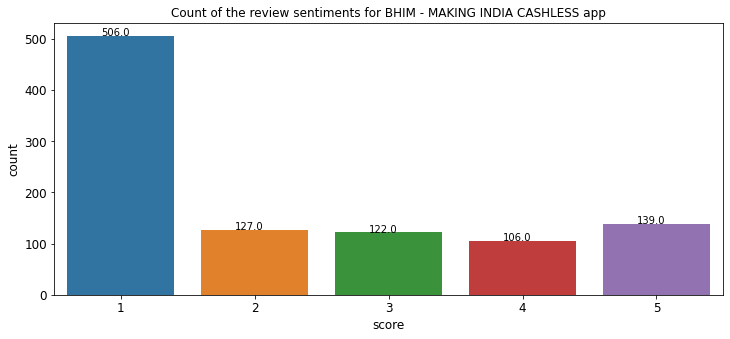

In [ ]:
graph(applist[3])

In [ ]:
lda(applist[3])

Topic: 0 
Words: 0.039*"open" + 0.034*"applic" + 0.025*"user" + 0.018*"unabl" + 0.018*"version" + 0.014*"like" + 0.013*"passcod" + 0.013*"bank"


Topic: 1 
Words: 0.024*"balanc" + 0.023*"fine" + 0.020*"check" + 0.019*"transfer" + 0.018*"option" + 0.016*"worst" + 0.016*"app" + 0.015*"complaint"


Topic: 2 
Words: 0.022*"look" + 0.022*"soon" + 0.019*"like" + 0.018*"possibl" + 0.014*"know" + 0.013*"solv" + 0.013*"think" + 0.013*"fine"


Topic: 3 
Words: 0.029*"bank" + 0.025*"unabl" + 0.019*"phone" + 0.019*"instal" + 0.018*"login" + 0.016*"check" + 0.014*"success" + 0.013*"reinstal"


Topic: 4 
Words: 0.043*"verif" + 0.034*"login" + 0.022*"reinstal" + 0.017*"uninstal" + 0.017*"face" + 0.016*"app" + 0.016*"servic" + 0.015*"stop"


Topic: 5 
Words: 0.037*"custom" + 0.027*"complaint" + 0.023*"rais" + 0.022*"care" + 0.017*"servic" + 0.016*"respons" + 0.016*"scan" + 0.015*"code"




### Topics



1. Negative Review: Login and Authentication Issues(technical)
2. Negative Review: Unable to check balance and bill payments.(technical)
3. Positive Review(non-technical)
4. Negative Review: Login and Authentication Issues(technical)
5. Negative Review: Login and Authentication Issues(technical)
6. Negative Revew: Help related issues.(non-technical)











##5)MobiKwik- UPI, Bills, PayLater

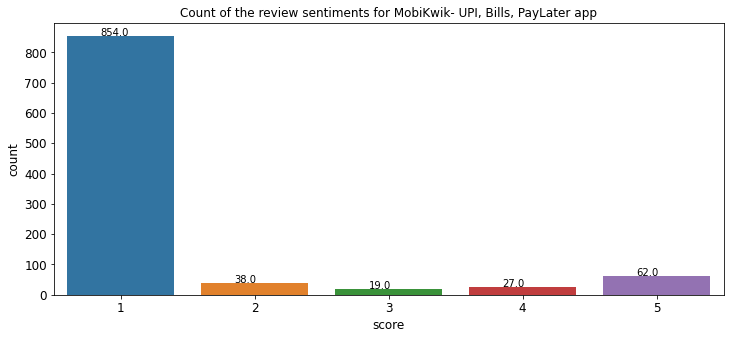

In [ ]:
graph(applist[4])

In [ ]:
lda(applist[4])

Topic: 0 
Words: 0.027*"order" + 0.026*"debit" + 0.018*"receiv" + 0.018*"fail" + 0.017*"merchant" + 0.016*"respons" + 0.014*"till" + 0.013*"success"


Topic: 1 
Words: 0.035*"cashback" + 0.025*"applic" + 0.023*"user" + 0.023*"receiv" + 0.021*"offer" + 0.020*"activ" + 0.020*"later" + 0.016*"useless"


Topic: 2 
Words: 0.022*"block" + 0.016*"fraud" + 0.016*"loan" + 0.015*"limit" + 0.014*"resolv" + 0.014*"penalti" + 0.013*"date" + 0.013*"repay"


Topic: 3 
Words: 0.042*"transfer" + 0.021*"app" + 0.020*"fail" + 0.016*"fraud" + 0.014*"number" + 0.014*"want" + 0.013*"dont" + 0.012*"ad"


Topic: 4 
Words: 0.045*"recharg" + 0.022*"number" + 0.020*"loan" + 0.018*"want" + 0.017*"cibil" + 0.015*"close" + 0.015*"balanc" + 0.014*"call"


Topic: 5 
Words: 0.026*"repli" + 0.025*"respons" + 0.022*"mail" + 0.017*"respond" + 0.017*"wait" + 0.016*"complaint" + 0.016*"ticket" + 0.016*"connect"




### Topics



1. Negative Review: Payment Issues(technical)
2. Negative Review: Rewards and Cashbacks are useless.(technical)
3. Negative Review: Payment Issues(technical)
4. Negative Review: Payment Issues(technical)
5. Negative Review:Unable to check balance and bill payments.(technical)
6. Negative Revew: Help related issues.(non-technical)











##6)Paytm for Business: Accept Payments for Merchants

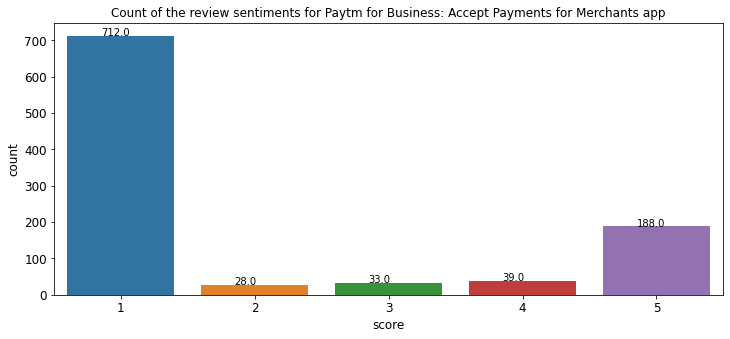

In [ ]:
graph(applist[5])

In [ ]:
lda(applist[5])

Topic: 0 
Words: 0.024*"charg" + 0.023*"soundbox" + 0.023*"instal" + 0.020*"refund" + 0.018*"return" + 0.016*"pick" + 0.016*"display" + 0.015*"chang"


Topic: 1 
Words: 0.044*"settl" + 0.028*"receiv" + 0.024*"abl" + 0.022*"show" + 0.021*"day" + 0.019*"stuck" + 0.019*"bank" + 0.018*"hour"


Topic: 2 
Words: 0.030*"bank" + 0.027*"show" + 0.024*"support" + 0.023*"day" + 0.023*"receiv" + 0.018*"experi" + 0.017*"loan" + 0.017*"transact"


Topic: 3 
Words: 0.027*"notif" + 0.024*"nice" + 0.024*"deduct" + 0.024*"best" + 0.023*"charg" + 0.021*"easi" + 0.018*"merchant" + 0.017*"option"


Topic: 4 
Words: 0.025*"compani" + 0.023*"experi" + 0.021*"charg" + 0.021*"solv" + 0.019*"help" + 0.019*"soundbox" + 0.018*"transact" + 0.017*"call"


Topic: 5 
Words: 0.031*"option" + 0.028*"support" + 0.027*"applic" + 0.025*"charg" + 0.024*"updat" + 0.020*"provid" + 0.016*"contact" + 0.016*"tri"




### Topics



1. Negative Review: Help related issues.(non-technical)
2. Negative Review: Transaction Details Error.(technical)
3. Negative Review: Payment Issues(technical)
4. Positive Review: Convenient .
5. Negative Review:Help related issues.(non-technical)
6. Negative Revew: Help related issues.(non-technical)











##7)Freecharge - Pay Later, UPI

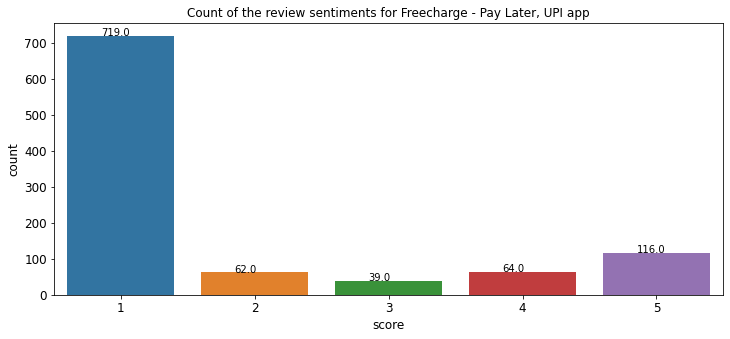

In [ ]:
graph(applist[6])

In [ ]:
lda(applist[6])

Topic: 0 
Words: 0.025*"wallet" + 0.024*"day" + 0.021*"charg" + 0.020*"poor" + 0.018*"balanc" + 0.017*"date" + 0.016*"care" + 0.016*"credit"


Topic: 1 
Words: 0.065*"updat" + 0.028*"number" + 0.026*"work" + 0.018*"send" + 0.018*"mobil" + 0.015*"problem" + 0.015*"check" + 0.013*"latest"


Topic: 2 
Words: 0.042*"card" + 0.039*"applic" + 0.038*"credit" + 0.018*"like" + 0.016*"provid" + 0.013*"receiv" + 0.013*"nice" + 0.013*"experi"


Topic: 3 
Words: 0.060*"offer" + 0.033*"code" + 0.023*"cash" + 0.020*"appli" + 0.018*"process" + 0.016*"coupon" + 0.016*"like" + 0.015*"say"


Topic: 4 
Words: 0.033*"refund" + 0.023*"mail" + 0.023*"repli" + 0.022*"care" + 0.021*"receiv" + 0.018*"contact" + 0.018*"email" + 0.018*"help"


Topic: 5 
Words: 0.047*"paylat" + 0.032*"work" + 0.029*"tri" + 0.026*"month" + 0.026*"charg" + 0.022*"generat" + 0.021*"date" + 0.018*"close"




### Topics



1. Negative Review: Transaction Details Error.(technical)
2. Negative Review: Data lost after updating phone number(technical)
3. Positive Review: Nice Experience.(non-technical)
4. Negative Review: Offers Related Issues(technical)
5. Negative Review:Help related issues.(non-technical)
6. Positive Revew: Paylater feature is good.(technical) 











##8)PayPal - Send, Shop, Manage

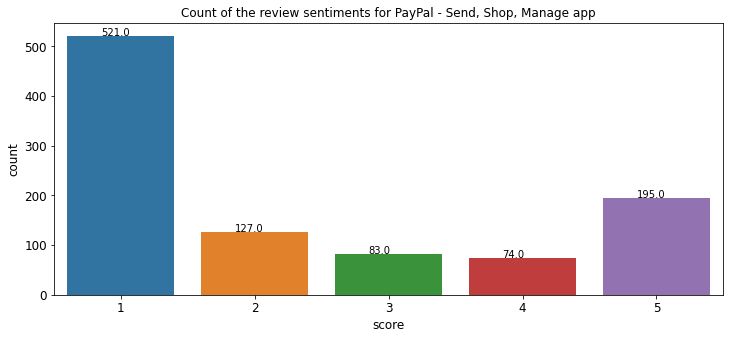

In [ ]:
graph(applist[7])

In [ ]:
lda(applist[7])

Topic: 0 
Words: 0.026*"crash" + 0.017*"month" + 0.016*"easi" + 0.016*"secur" + 0.015*"option" + 0.014*"friend" + 0.012*"featur" + 0.012*"year"


Topic: 1 
Words: 0.019*"login" + 0.017*"contact" + 0.016*"support" + 0.015*"day" + 0.015*"messag" + 0.012*"worst" + 0.012*"limit" + 0.010*"want"


Topic: 2 
Words: 0.026*"cash" + 0.020*"chang" + 0.018*"check" + 0.014*"thing" + 0.014*"contact" + 0.013*"secur" + 0.012*"differ" + 0.011*"deposit"


Topic: 3 
Words: 0.028*"password" + 0.017*"email" + 0.015*"say" + 0.014*"credit" + 0.014*"chang" + 0.011*"tell" + 0.011*"know" + 0.011*"abl"


Topic: 4 
Words: 0.023*"number" + 0.022*"balanc" + 0.017*"code" + 0.014*"refund" + 0.014*"sign" + 0.012*"keep" + 0.012*"purchas" + 0.011*"close"


Topic: 5 
Words: 0.020*"fee" + 0.016*"day" + 0.016*"hold" + 0.015*"charg" + 0.015*"link" + 0.013*"recommend" + 0.013*"great" + 0.013*"make"




### Topics



1. Negative Review: Transaction Details Error.(technical)
2. Negative Review: Support related issues.(non-technical)
3. Positive Review: Nice Experience.(non-technical)
4. Negative Review: Privacy Related Issues(technical)
5. Negative Review:Offers Related Issues.(non-technical)
6. Positive Revew: Nice experience(non-technical) 











##9)Payzapp - UPI & Bill Payments

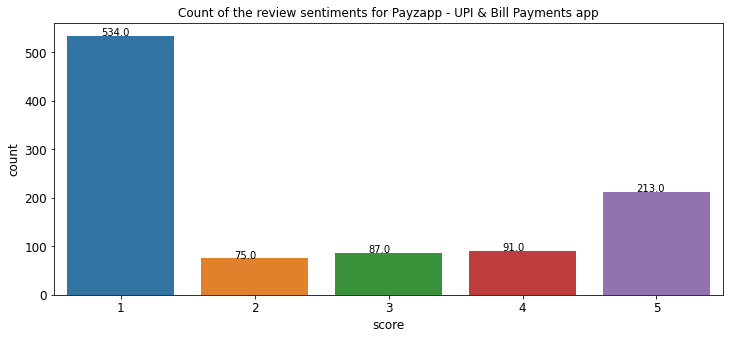

In [ ]:
graph(applist[8])

In [ ]:
lda(applist[8])

Topic: 0 
Words: 0.041*"need" + 0.041*"user" + 0.028*"improv" + 0.025*"easi" + 0.023*"friend" + 0.020*"hdfc" + 0.020*"like" + 0.020*"interfac"


Topic: 1 
Words: 0.030*"number" + 0.028*"take" + 0.024*"code" + 0.023*"slow" + 0.022*"problem" + 0.021*"servic" + 0.018*"appli" + 0.016*"updat"


Topic: 2 
Words: 0.033*"abl" + 0.031*"error" + 0.030*"account" + 0.027*"show" + 0.025*"tri" + 0.025*"applic" + 0.021*"open" + 0.018*"month"


Topic: 3 
Words: 0.025*"hdfc" + 0.023*"deduct" + 0.022*"account" + 0.021*"day" + 0.018*"care" + 0.017*"tri" + 0.017*"number" + 0.016*"experi"


Topic: 4 
Words: 0.030*"bill" + 0.025*"updat" + 0.023*"link" + 0.023*"get" + 0.022*"love" + 0.021*"experi" + 0.021*"great" + 0.020*"wallet"


Topic: 5 
Words: 0.047*"verif" + 0.030*"verifi" + 0.028*"phone" + 0.026*"ask" + 0.022*"login" + 0.017*"devic" + 0.017*"updat" + 0.014*"wallet"




### Topics



1. Negative Review: Needs to improve user-friendly services.(non-technical)
2. Negative Review: Login and authentication is slow..(technical)
3. Negative Review: Transaction details error.(technical)
4. Negative Review: Payment Issues(technical)
5. Positive Review:Great experience.(non-technical)
6. Negative Revew: Login and Authorisation issues. (technical) 











##10)Samsung Wallet (Samsung Pay)

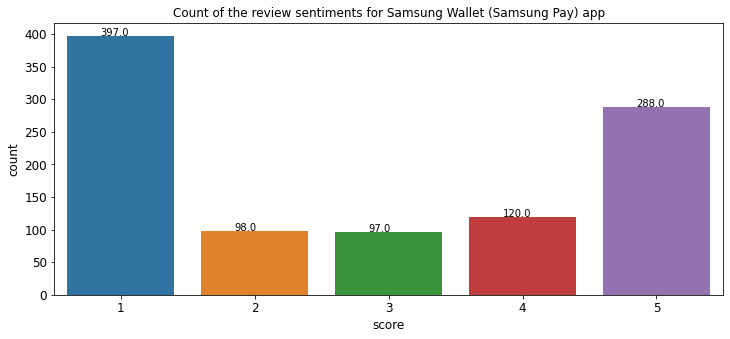

In [ ]:
graph(applist[9])

In [ ]:
lda(applist[9])

Topic: 0 
Words: 0.024*"start" + 0.016*"uninstal" + 0.015*"stop" + 0.015*"reinstal" + 0.013*"keep" + 0.013*"open" + 0.012*"year" + 0.011*"issu"


Topic: 1 
Words: 0.017*"love" + 0.016*"swipe" + 0.016*"termin" + 0.015*"purchas" + 0.013*"googl" + 0.013*"appl" + 0.011*"place" + 0.011*"accept"


Topic: 2 
Words: 0.021*"watch" + 0.019*"year" + 0.013*"credit" + 0.013*"option" + 0.011*"gift" + 0.011*"anymor" + 0.009*"membership" + 0.009*"pretti"


Topic: 3 
Words: 0.029*"fingerprint" + 0.017*"ultra" + 0.016*"love" + 0.015*"galaxi" + 0.013*"note" + 0.013*"scan" + 0.012*"abl" + 0.011*"longer"


Topic: 4 
Words: 0.018*"open" + 0.018*"uninstal" + 0.018*"want" + 0.015*"cash" + 0.012*"account" + 0.012*"support" + 0.011*"annoy" + 0.011*"purchas"


Topic: 5 
Words: 0.021*"expir" + 0.018*"transact" + 0.018*"good" + 0.017*"save" + 0.014*"place" + 0.013*"item" + 0.013*"credit" + 0.012*"option"




### Topics



1. Negative Review: Installation issues.(non-technical)
2. Positive Review: Convenient interface .(technical)
3. Positive Review: Good features and user friendly interface(technical)
4. Positive Review: Good security(technical)
5. Negative Review:App not working properly(technical)
6. Positive Revew: Good experience (non-technical) 











##11)Yuva Pay:UPI, Wallet, Payments

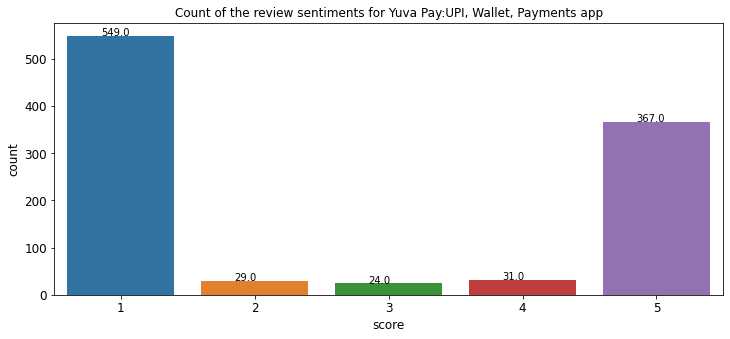

In [ ]:
graph(applist[10])

In [ ]:
lda(applist[10])

Topic: 0 
Words: 0.071*"reward" + 0.047*"get" + 0.037*"offer" + 0.036*"point" + 0.034*"easi" + 0.033*"great" + 0.030*"user" + 0.027*"card"


Topic: 1 
Words: 0.060*"refund" + 0.052*"debit" + 0.043*"deduct" + 0.040*"bank" + 0.037*"show" + 0.032*"day" + 0.029*"yuva" + 0.027*"balanc"


Topic: 2 
Words: 0.053*"problem" + 0.038*"issu" + 0.034*"updat" + 0.026*"open" + 0.026*"work" + 0.026*"secur" + 0.025*"support" + 0.024*"show"


Topic: 3 
Words: 0.142*"applic" + 0.060*"server" + 0.049*"slow" + 0.027*"experi" + 0.026*"use" + 0.024*"work" + 0.023*"best" + 0.021*"featur"


Topic: 4 
Words: 0.057*"instal" + 0.038*"reward" + 0.033*"fake" + 0.033*"offer" + 0.026*"transfer" + 0.026*"mobil" + 0.023*"abl" + 0.023*"number"


Topic: 5 
Words: 0.092*"cashback" + 0.060*"nice" + 0.054*"featur" + 0.037*"best" + 0.036*"assur" + 0.035*"internet" + 0.031*"work" + 0.029*"like"




### Topics



1. Positive Revew: Good experience (non-technical) 
2. Positive Review: Convenient interface .(technical)
3. Negative Review: Support related issues.(non-technical)
4. Negative Review:App not working properly and slow experience(technical)
5. Negative Review:Rewards related issues(technical)
6. Positive Revew: Good experience with cashbacks and other features (non-technical) 











##12)Money Transfer, BHIM UPI

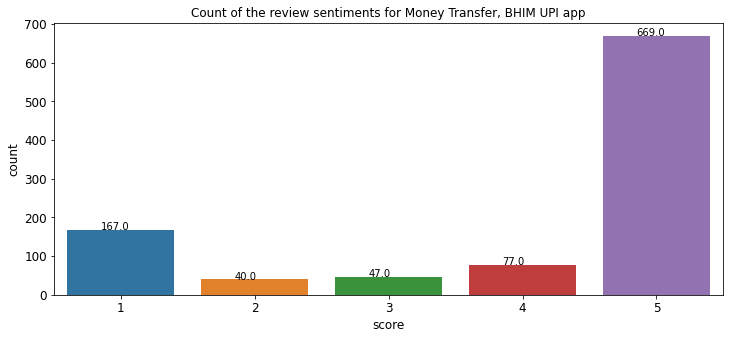

In [ ]:
graph(applist[11])

In [ ]:
lda(applist[11])

Topic: 0 
Words: 0.164*"easi" + 0.113*"cash" + 0.093*"ultra" + 0.035*"fast" + 0.035*"applic" + 0.023*"excel" + 0.023*"awesom" + 0.022*"lone"


Topic: 1 
Words: 0.122*"applic" + 0.099*"transact" + 0.070*"fast" + 0.041*"time" + 0.034*"ultracash" + 0.034*"great" + 0.034*"pend" + 0.028*"custom"


Topic: 2 
Words: 0.114*"work" + 0.098*"best" + 0.053*"ultracash" + 0.047*"team" + 0.043*"phone" + 0.038*"custom" + 0.032*"support" + 0.018*"transact"


Topic: 3 
Words: 0.082*"problem" + 0.075*"use" + 0.063*"quick" + 0.055*"like" + 0.046*"super" + 0.039*"love" + 0.032*"issu" + 0.030*"respons"


Topic: 4 
Words: 0.077*"app" + 0.057*"best" + 0.055*"payment" + 0.049*"recharg" + 0.049*"help" + 0.041*"ultracash" + 0.037*"happi" + 0.035*"provid"


Topic: 5 
Words: 0.076*"account" + 0.068*"card" + 0.066*"bank" + 0.052*"time" + 0.044*"debit" + 0.035*"send" + 0.030*"option" + 0.027*"credit"




### Topics



1. Positive Revew: Good experience (non-technical) 
2. Positive Review: fast transactions(technical)
3.  Positive Review: fast transactions and Good Support Team(non-technical)
4. Positive Review:Good Support Team(non-technical)
5. Positive Revew: Good experience (non-technical) 
6. Positive Revew: Convenient features.(technical)











##13)Google Pay for Business

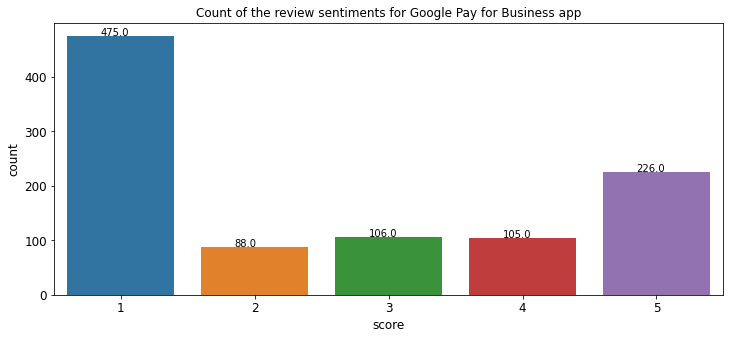

In [ ]:
graph(applist[12])

In [ ]:
lda(applist[12])

Topic: 0 
Words: 0.034*"offer" + 0.031*"verif" + 0.029*"verifi" + 0.026*"like" + 0.024*"gpay" + 0.024*"video" + 0.022*"cashback" + 0.022*"option"


Topic: 1 
Words: 0.034*"voic" + 0.030*"updat" + 0.029*"number" + 0.027*"problem" + 0.023*"mobil" + 0.022*"bank" + 0.021*"settl" + 0.021*"get"


Topic: 2 
Words: 0.033*"reward" + 0.024*"tri" + 0.022*"care" + 0.021*"contact" + 0.020*"team" + 0.018*"experi" + 0.017*"problem" + 0.017*"verif"


Topic: 3 
Words: 0.056*"easi" + 0.045*"credit" + 0.025*"fast" + 0.025*"instant" + 0.022*"bank" + 0.017*"help" + 0.017*"transfer" + 0.016*"thing"


Topic: 4 
Words: 0.027*"settlement" + 0.024*"nice" + 0.024*"app" + 0.021*"bank" + 0.018*"show" + 0.017*"number" + 0.016*"work" + 0.014*"applic"


Topic: 5 
Words: 0.026*"need" + 0.024*"work" + 0.021*"user" + 0.018*"gpay" + 0.018*"show" + 0.017*"great" + 0.017*"featur" + 0.016*"updat"




### Topics



1. Negative Revew: Long verification process for Rewards and cashbacks  (non-technical) 
2. Negative Review: Issue updating Phone number(technical)
3. Negative Review: Rewards related issues(technical)
4. Positive Review:Fast transactions(technical)
5. Positive Revew: Good experience (non-technical) 
6. Positive Revew: Convenient features.(technical)











##14)iMobile Pay by ICICI Bank

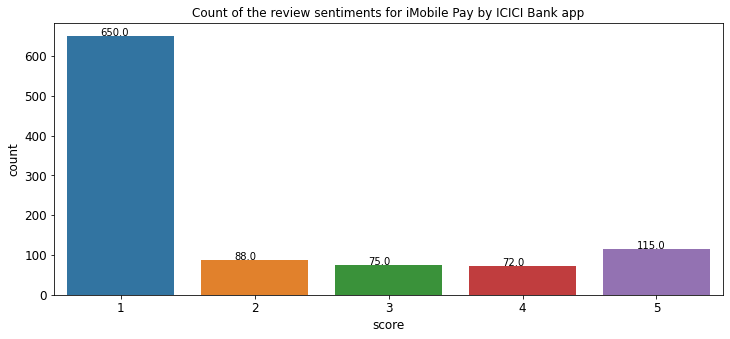

In [ ]:
graph(applist[13])

In [ ]:
lda(applist[13])

Topic: 0 
Words: 0.028*"load" + 0.024*"number" + 0.014*"get" + 0.013*"open" + 0.012*"screen" + 0.012*"annoy" + 0.011*"uninstal" + 0.011*"ask"


Topic: 1 
Words: 0.019*"connect" + 0.017*"get" + 0.015*"deduct" + 0.014*"day" + 0.014*"money" + 0.013*"check" + 0.013*"fail" + 0.012*"authent"


Topic: 2 
Words: 0.023*"open" + 0.019*"statement" + 0.016*"notif" + 0.015*"call" + 0.015*"paid" + 0.015*"share" + 0.014*"provid" + 0.012*"screen"


Topic: 3 
Words: 0.019*"imobil" + 0.018*"balanc" + 0.018*"number" + 0.017*"link" + 0.016*"app" + 0.015*"friend" + 0.014*"support" + 0.014*"open"


Topic: 4 
Words: 0.038*"applic" + 0.028*"money" + 0.024*"transfer" + 0.016*"featur" + 0.016*"connect" + 0.014*"thank" + 0.012*"process" + 0.012*"error"


Topic: 5 
Words: 0.015*"error" + 0.015*"page" + 0.014*"easi" + 0.014*"click" + 0.014*"detail" + 0.012*"imobil" + 0.011*"loan" + 0.010*"statement"




### Topics



1. Negative Revew: App not working properly(technical) 
2. Negative Review: Authentication issue(technical)
3. Negative Review: Notifications are not received(technical)
4. Positive Review:Good Experience(technical)
5. Negative Review:Payment Issues (technical) 
6. Negative review: App not working properly.(technical)











##15)PhonePe Business

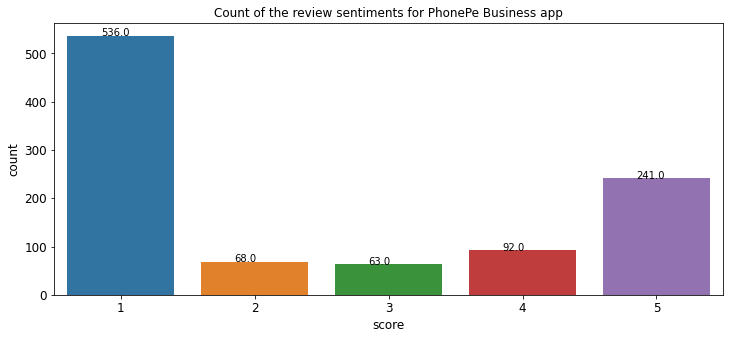

In [ ]:
graph(applist[14])

In [ ]:
lda(applist[14])

Topic: 0 
Words: 0.039*"like" + 0.034*"offer" + 0.031*"featur" + 0.028*"merchant" + 0.027*"charg" + 0.024*"cashback" + 0.018*"avail" + 0.017*"best"


Topic: 1 
Words: 0.042*"nice" + 0.039*"easi" + 0.030*"support" + 0.026*"better" + 0.021*"experi" + 0.017*"code" + 0.015*"chang" + 0.015*"disappoint"


Topic: 2 
Words: 0.043*"work" + 0.042*"updat" + 0.042*"notif" + 0.025*"detail" + 0.018*"care" + 0.018*"support" + 0.018*"problem" + 0.016*"khata"


Topic: 3 
Words: 0.036*"messag" + 0.030*"settl" + 0.029*"problem" + 0.024*"updat" + 0.024*"get" + 0.021*"voic" + 0.021*"work" + 0.020*"notif"


Topic: 4 
Words: 0.041*"number" + 0.027*"day" + 0.027*"care" + 0.027*"help" + 0.024*"credit" + 0.023*"merchant" + 0.017*"contact" + 0.016*"support"


Topic: 5 
Words: 0.035*"login" + 0.032*"abl" + 0.023*"instant" + 0.022*"link" + 0.021*"problem" + 0.020*"send" + 0.017*"chang" + 0.017*"histori"




### Topics



1. Positive Revew: Good offers and cashbacks(technical) 
2. Positive Review: Good support team but updating details takes long.(technical)
3. Negative Review: updating details takes long and support team is slow(technical)
4. Negative Review:Notifications are slow(technical)
5. Positive Review:Good Support team (non-technical) 
6. Positive review: Convenient user interface.(technical)











## 16)Fyp- Payment App for Teens

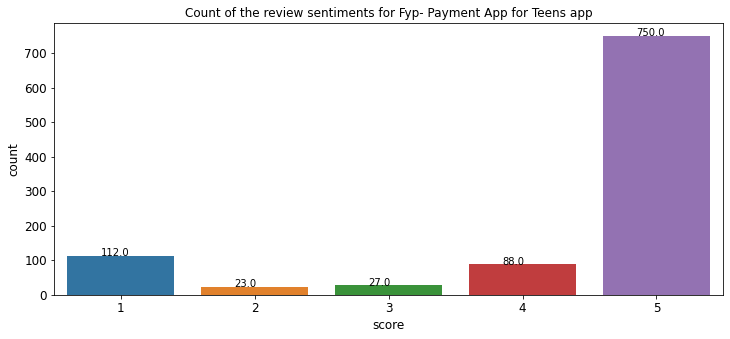

In [ ]:
graph(applist[15])

In [ ]:
lda(applist[15])

Topic: 0 
Words: 0.075*"manag" + 0.066*"digit" + 0.047*"amaz" + 0.045*"recommend" + 0.029*"make" + 0.026*"transfer" + 0.023*"wallet" + 0.021*"onlin"


Topic: 1 
Words: 0.040*"simpl" + 0.039*"offer" + 0.036*"onlin" + 0.036*"fantast" + 0.035*"friend" + 0.029*"happi" + 0.029*"generat" + 0.027*"easili"


Topic: 2 
Words: 0.073*"learn" + 0.038*"save" + 0.036*"child" + 0.027*"fantast" + 0.027*"experi" + 0.026*"offer" + 0.022*"financ" + 0.022*"amaz"


Topic: 3 
Words: 0.067*"team" + 0.063*"respons" + 0.036*"better" + 0.034*"problem" + 0.022*"make" + 0.018*"time" + 0.016*"bring" + 0.013*"avail"


Topic: 4 
Words: 0.059*"option" + 0.024*"need" + 0.023*"give" + 0.022*"applic" + 0.022*"transfer" + 0.021*"want" + 0.021*"thing" + 0.021*"literaci"


Topic: 5 
Words: 0.036*"time" + 0.031*"ad" + 0.026*"work" + 0.024*"day" + 0.023*"support" + 0.023*"refund" + 0.021*"soon" + 0.021*"month"




### Topics

1. Positive Revew: Useful for Personal Finance management online. (non-technical)
2. Positive Review: Simple transactions.(technical)
3. Positive Review: Great app to learn saving for children(non-technical)
4. Positive Review:Good Support team (non-technical) 
5. Negative Review:Needs more lingual diversity (technical) 
6. Negative review: Advertisments(technical)











## 17)Skrill - Pay & Transfer Money

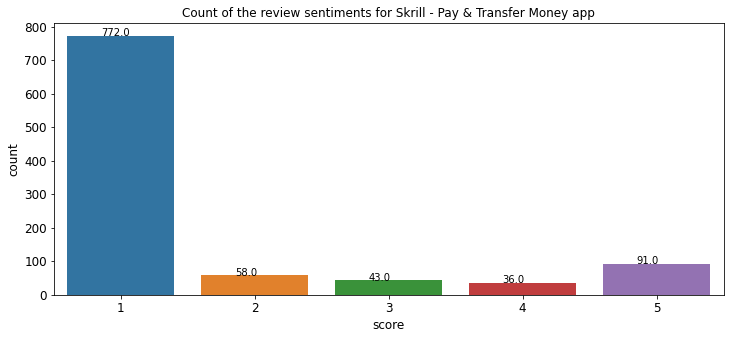

In [ ]:
graph(applist[16])

In [ ]:
lda(applist[16])

Topic: 0 
Words: 0.024*"address" + 0.017*"reject" + 0.017*"sent" + 0.015*"phone" + 0.014*"terribl" + 0.013*"process" + 0.013*"say" + 0.013*"stuck"


Topic: 1 
Words: 0.026*"password" + 0.019*"error" + 0.017*"chang" + 0.017*"login" + 0.016*"say" + 0.015*"star" + 0.013*"problem" + 0.012*"scam"


Topic: 2 
Words: 0.019*"scam" + 0.017*"process" + 0.017*"block" + 0.017*"recommend" + 0.014*"week" + 0.014*"fraud" + 0.013*"rate" + 0.013*"app"


Topic: 3 
Words: 0.031*"good" + 0.017*"address" + 0.014*"complet" + 0.014*"easi" + 0.013*"away" + 0.012*"upload" + 0.012*"stay" + 0.012*"useless"


Topic: 4 
Words: 0.030*"close" + 0.018*"ask" + 0.014*"case" + 0.013*"know" + 0.012*"reason" + 0.011*"contact" + 0.011*"fund" + 0.011*"abl"


Topic: 5 
Words: 0.027*"charg" + 0.020*"accept" + 0.018*"option" + 0.016*"rate" + 0.016*"updat" + 0.015*"fast" + 0.015*"secur" + 0.014*"fee"




### Topics



1. Negative review: App not working properly.(technical)
2. Negative Review:Login and Authentication issues.(technical)
3. Negative Review:Fraud(technical)
4. Negative Review:App not working properly(technical)
5. Negative Review: Support issues (non-technical) 
6. Positive review: Fast transactions.(technical)











## 18)BharatPe for Merchants

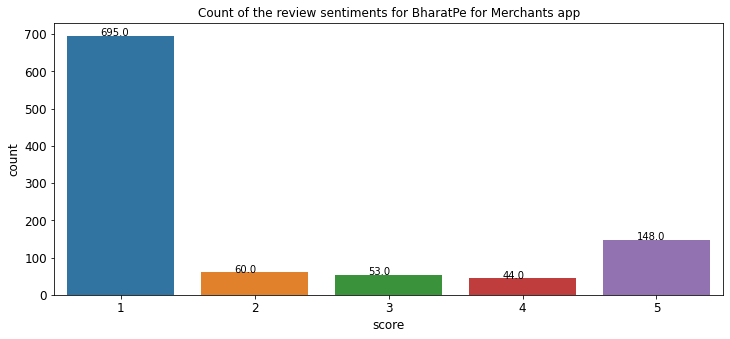

In [ ]:
graph(applist[17])

In [ ]:
lda(applist[17])

Topic: 0 
Words: 0.075*"card" + 0.055*"credit" + 0.026*"receiv" + 0.023*"experi" + 0.022*"month" + 0.019*"block" + 0.017*"debit" + 0.015*"solv"


Topic: 1 
Words: 0.027*"user" + 0.027*"give" + 0.022*"credit" + 0.021*"respons" + 0.021*"star" + 0.020*"applic" + 0.017*"bank" + 0.016*"fake"


Topic: 2 
Words: 0.035*"bank" + 0.032*"transfer" + 0.030*"day" + 0.025*"withdraw" + 0.018*"want" + 0.017*"poor" + 0.017*"option" + 0.017*"abl"


Topic: 3 
Words: 0.045*"recharg" + 0.030*"unabl" + 0.030*"experi" + 0.024*"slow" + 0.024*"busi" + 0.019*"get" + 0.019*"process" + 0.017*"soon"


Topic: 4 
Words: 0.035*"option" + 0.033*"easi" + 0.029*"applic" + 0.019*"number" + 0.018*"provid" + 0.018*"merchant" + 0.017*"contact" + 0.015*"help"


Topic: 5 
Words: 0.062*"open" + 0.045*"machin" + 0.038*"problem" + 0.037*"charg" + 0.027*"swipe" + 0.022*"face" + 0.016*"receiv" + 0.016*"day"




### Topics

1. Negative Revew:Payment issues(technical) 
2. Negative Review: Security related issues(technical)
3. Negative Review: Does not have basic features required for transactions.(technical)
4. Negative Review:Transactions are slow(technical)
5. Positive Review:Good User interface (non-technical) 
6. Positive review: Convenient transactions.(technical)











## 19)BHIM SBI Pay:Retail & Business

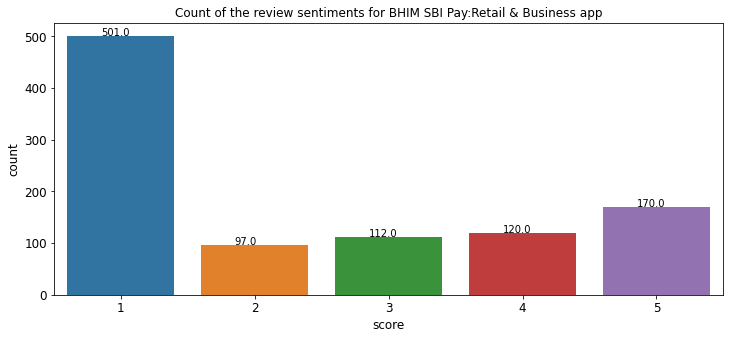

In [ ]:
graph(applist[18])

In [ ]:
lda(applist[18])

Topic: 0 
Words: 0.045*"download" + 0.035*"devic" + 0.024*"root" + 0.023*"play" + 0.023*"transfer" + 0.021*"error" + 0.019*"store" + 0.018*"version"


Topic: 1 
Words: 0.023*"registr" + 0.022*"user" + 0.018*"process" + 0.016*"request" + 0.015*"want" + 0.015*"easi" + 0.015*"card" + 0.013*"allow"


Topic: 2 
Words: 0.037*"scan" + 0.033*"mobil" + 0.028*"code" + 0.023*"number" + 0.022*"need" + 0.019*"take" + 0.018*"improv" + 0.017*"recharg"


Topic: 3 
Words: 0.029*"recharg" + 0.025*"day" + 0.024*"disput" + 0.022*"fail" + 0.022*"rais" + 0.018*"deduct" + 0.018*"worst" + 0.018*"custom"


Topic: 4 
Words: 0.029*"option" + 0.022*"easi" + 0.022*"regist" + 0.019*"mobil" + 0.019*"balanc" + 0.017*"thank" + 0.016*"bhim" + 0.016*"develop"


Topic: 5 
Words: 0.027*"regist" + 0.025*"error" + 0.020*"phone" + 0.018*"abl" + 0.018*"say" + 0.018*"unabl" + 0.016*"verifi" + 0.016*"uninstal"




### Topics

1. Negative Revew: Installation issues(technical) 
2. Negative Review:Complex Registering process(technical)
3. Negative Review:Complex Login and authentication process(technical)
4. Negative Review:Payments Failed(technical)
5. Positive Review:Good User friendly interface (non-technical) 
6. Negative review: Login and authentication issues.(technical)











## 20)muvin: Teenagers Payment App

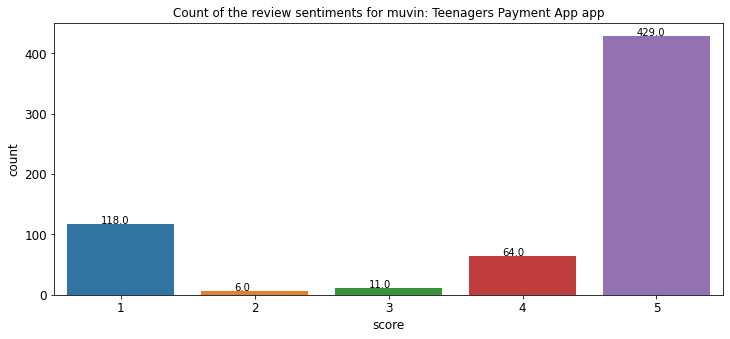

In [ ]:
graph(applist[19])

In [ ]:
lda(applist[19])

Topic: 0 
Words: 0.076*"easi" + 0.063*"help" + 0.059*"like" + 0.041*"conveni" + 0.040*"great" + 0.032*"download" + 0.029*"transfer" + 0.027*"use"


Topic: 1 
Words: 0.053*"account" + 0.049*"open" + 0.047*"digit" + 0.043*"recommend" + 0.041*"payment" + 0.034*"awesom" + 0.033*"option" + 0.033*"manag"


Topic: 2 
Words: 0.056*"great" + 0.054*"teen" + 0.049*"payment" + 0.045*"featur" + 0.041*"get" + 0.041*"easili" + 0.041*"servic" + 0.033*"pocket"


Topic: 3 
Words: 0.066*"pocket" + 0.062*"easili" + 0.055*"transact" + 0.049*"concept" + 0.047*"fake" + 0.041*"custom" + 0.038*"send" + 0.031*"secur"


Topic: 4 
Words: 0.126*"nice" + 0.064*"amaz" + 0.061*"love" + 0.054*"user" + 0.050*"minor" + 0.048*"experi" + 0.043*"interfac" + 0.039*"friend"


Topic: 5 
Words: 0.066*"financi" + 0.062*"manag" + 0.045*"save" + 0.033*"parent" + 0.032*"kid" + 0.031*"excel" + 0.031*"financ" + 0.027*"featur"




### Topics

1. Positive Revew: Good experience(technical) 
2. Positive Review: Best for finance management.(technical)
3. Positive Review: Includes good features needed for teens(technical)
4. Negative Review:Security related issues(technical)
5. Positive Review:Convenient user interface. (non-technical) 
6. Positive review: Best for Family finance management..(technical)











## 21)BHIM YES PAY - UPI, Wallet, Recharge, Bharat QR

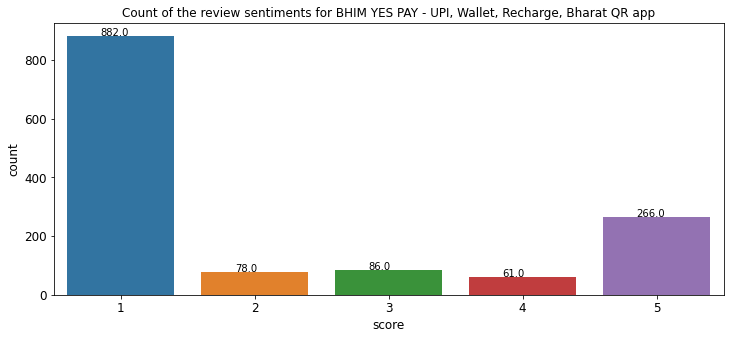

In [ ]:
graph(applist[20])

In [ ]:
lda(applist[20])

Topic: 0 
Words: 0.054*"credit" + 0.045*"debit" + 0.043*"transact" + 0.040*"ad" + 0.038*"load" + 0.032*"account" + 0.026*"deduct" + 0.026*"time"


Topic: 1 
Words: 0.047*"transact" + 0.042*"fail" + 0.038*"work" + 0.030*"refund" + 0.027*"issu" + 0.024*"day" + 0.021*"user" + 0.020*"tri"


Topic: 2 
Words: 0.058*"nice" + 0.052*"problem" + 0.045*"updat" + 0.043*"applic" + 0.030*"work" + 0.029*"credit" + 0.029*"good" + 0.029*"year"


Topic: 3 
Words: 0.088*"good" + 0.043*"unabl" + 0.020*"mail" + 0.020*"issu" + 0.020*"support" + 0.019*"time" + 0.019*"help" + 0.018*"fraud"


Topic: 4 
Words: 0.040*"payment" + 0.038*"like" + 0.033*"transfer" + 0.030*"open" + 0.030*"account" + 0.028*"login" + 0.027*"transact" + 0.026*"need"


Topic: 5 
Words: 0.047*"time" + 0.046*"servic" + 0.041*"account" + 0.034*"number" + 0.030*"work" + 0.029*"show" + 0.028*"error" + 0.027*"care"




### Topics



1. Negative Revew: Ads during payment resulting in* Payment issues*(technical) 
2. Negative Review: Payment issues and Bad Support team(technical)
3. Positive Review: Good  Support Team(non-technical)
4. Positive Review:Good experience and Support team takes long time(non-technical)
5. Positive Review:Good transactions (non-technical) 
6. Negative review: Bad Support team(non-technical)











## 22)Airtel Thanks – Recharge & UPI

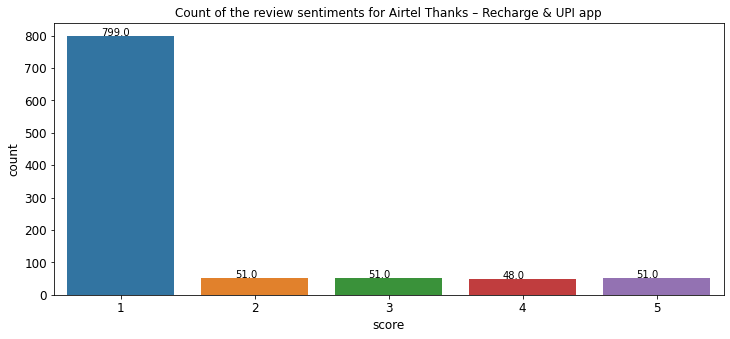

In [ ]:
graph(applist[21])

In [ ]:
lda(applist[21])

Topic: 0 
Words: 0.023*"download" + 0.022*"plan" + 0.015*"abl" + 0.015*"user" + 0.014*"better" + 0.014*"card" + 0.013*"rais" + 0.012*"unabl"


Topic: 1 
Words: 0.034*"version" + 0.023*"plan" + 0.016*"load" + 0.015*"peopl" + 0.014*"charg" + 0.014*"user" + 0.014*"chang" + 0.014*"pathet"


Topic: 2 
Words: 0.022*"balanc" + 0.020*"bank" + 0.018*"account" + 0.018*"deduct" + 0.017*"refund" + 0.016*"proper" + 0.015*"check" + 0.014*"give"


Topic: 3 
Words: 0.020*"tri" + 0.016*"account" + 0.015*"say" + 0.014*"open" + 0.013*"unabl" + 0.013*"messag" + 0.013*"mobil" + 0.011*"balanc"


Topic: 4 
Words: 0.024*"transact" + 0.023*"mail" + 0.020*"rais" + 0.020*"tri" + 0.018*"get" + 0.012*"broadband" + 0.012*"help" + 0.011*"histori"


Topic: 5 
Words: 0.018*"support" + 0.016*"resolv" + 0.015*"broadband" + 0.014*"speed" + 0.010*"port" + 0.010*"ask" + 0.010*"solv" + 0.010*"request"




### Topics



1. Negative Revew: Payment issues(technical) 
2. Negative Review: Bad user interface(technical)
3. Negative Review: Payment Issues(technical)
4. Negative Review:Unable to check balance and previous transactions(technical)
5. Negative Review:Slow Support team (non-technical) 
6. Negative review: Connectivity issues.(technical)











## 23)F-Pay, Wallet to Bank Transfer

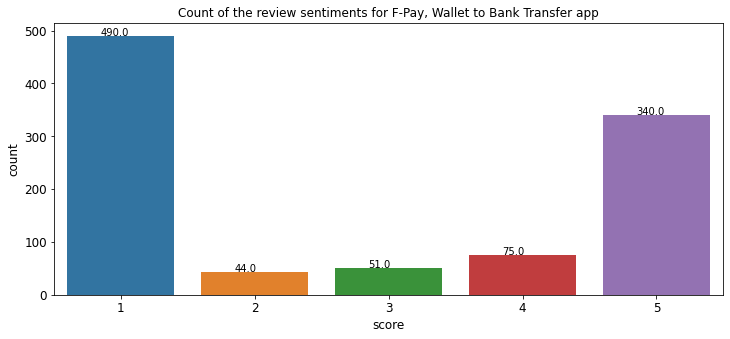

In [ ]:
graph(applist[22])

In [ ]:
lda(applist[22])

Topic: 0 
Words: 0.058*"credit" + 0.044*"transact" + 0.041*"card" + 0.039*"worst" + 0.032*"deduct" + 0.030*"fpay" + 0.028*"debit" + 0.023*"fraud"


Topic: 1 
Words: 0.062*"applic" + 0.053*"support" + 0.043*"help" + 0.042*"fake" + 0.036*"care" + 0.034*"repli" + 0.028*"whatsapp" + 0.027*"number"


Topic: 2 
Words: 0.110*"best" + 0.079*"recharg" + 0.040*"charg" + 0.038*"support" + 0.035*"thank" + 0.032*"fast" + 0.031*"bank" + 0.024*"limit"


Topic: 3 
Words: 0.103*"nice" + 0.056*"work" + 0.046*"time" + 0.037*"app" + 0.033*"easi" + 0.032*"trust" + 0.031*"wast" + 0.028*"download"


Topic: 4 
Words: 0.083*"payment" + 0.072*"option" + 0.069*"charg" + 0.066*"ad" + 0.032*"fraud" + 0.024*"remov" + 0.019*"success" + 0.018*"recharg"


Topic: 5 
Words: 0.059*"show" + 0.043*"problem" + 0.033*"balanc" + 0.030*"fpay" + 0.029*"time" + 0.028*"bank" + 0.028*"work" + 0.026*"tri"




### Topics

1. Negative Revew: Bad transactions(technical) 
2. Negative Review: Bad security and support team (technical)
3. Positive Review: Fast transactions(technical)
4. Positive Review: Convenient transactions(technical)
5. Negative Review:Ads in the middle of payment resulting in Payment failing.(technical) 
6. Negative review: Can't check the balance.(technical)











## 24)Razorpay Payments for Business

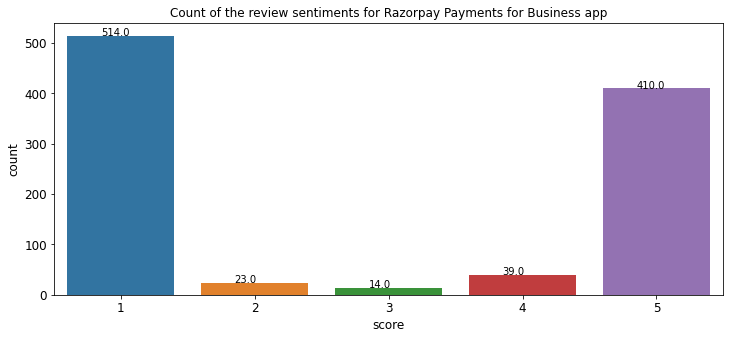

In [ ]:
graph(applist[23])

In [ ]:
lda(applist[23])

Topic: 0 
Words: 0.051*"busi" + 0.047*"refund" + 0.034*"day" + 0.031*"receiv" + 0.028*"work" + 0.026*"use" + 0.022*"razor" + 0.020*"download"


Topic: 1 
Words: 0.026*"gateway" + 0.022*"refund" + 0.021*"issu" + 0.020*"websit" + 0.020*"ask" + 0.018*"team" + 0.018*"ticket" + 0.017*"activ"


Topic: 2 
Words: 0.044*"experi" + 0.034*"fake" + 0.026*"process" + 0.025*"login" + 0.022*"settlement" + 0.018*"ask" + 0.018*"month" + 0.015*"submit"


Topic: 3 
Words: 0.079*"best" + 0.044*"recommend" + 0.034*"onlin" + 0.034*"friend" + 0.033*"experi" + 0.032*"easi" + 0.032*"user" + 0.031*"great"


Topic: 4 
Words: 0.063*"easi" + 0.043*"accept" + 0.039*"help" + 0.031*"amaz" + 0.030*"bank" + 0.026*"love" + 0.026*"fast" + 0.025*"transact"


Topic: 5 
Words: 0.047*"fraud" + 0.043*"hold" + 0.032*"compani" + 0.031*"settlement" + 0.026*"day" + 0.024*"scam" + 0.023*"repli" + 0.020*"mail"




### Topics

1. Positive Revew: Efficient transactions and refunds.(technical) 
2. Positive Review: Good support team (non-technical)
3. Negative Review: Fraud accounts(technical)
4. Positive Review:Good Experience(technical)
5. Positive Review:Easy and fast  transactions (technical) 
6. Negative review: Fraud issues and Bad support team(technical)











## 25)Ola Money - Wallet payments










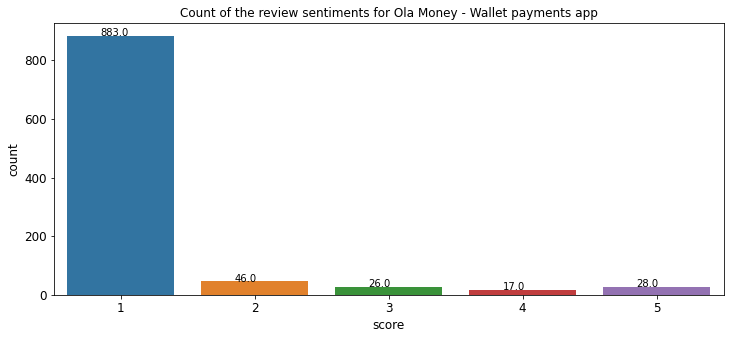

In [ ]:
graph(applist[24])

In [ ]:
lda(applist[24])

### Topics

1. Negative Revew:Bad Support Team,Refund issues(technical) 
2. Negative Review: Recharge issues.(technical)
3. Negative Review: bad experience with driver(non-technical)
4. Negative Review:Payments Issues(technical)
5. Negative Review:App not working properly (technical) 
6. Negative review: Login and Authentication Issues(technical)











## 26)Bill Payment & Recharge,Wallet

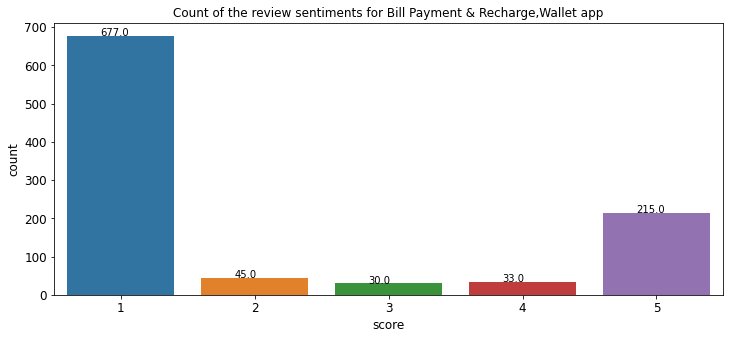

In [159]:
graph(applist[25])

In [160]:
lda(applist[25])

Topic: 0 
Words: 0.137*"work" + 0.109*"servic" + 0.050*"custom" + 0.044*"download" + 0.038*"time" + 0.036*"fake" + 0.030*"poor" + 0.029*"oxigen"


Topic: 1 
Words: 0.083*"wrong" + 0.079*"nice" + 0.074*"error" + 0.069*"went" + 0.057*"instal" + 0.055*"open" + 0.042*"show" + 0.036*"app"


Topic: 2 
Words: 0.085*"open" + 0.080*"recharg" + 0.048*"mobil" + 0.040*"point" + 0.039*"charg" + 0.034*"servic" + 0.033*"payback" + 0.031*"wrost"


Topic: 3 
Words: 0.063*"bank" + 0.055*"card" + 0.051*"transfer" + 0.043*"wast" + 0.040*"refund" + 0.035*"account" + 0.030*"time" + 0.030*"ad"


Topic: 4 
Words: 0.056*"avail" + 0.040*"time" + 0.036*"compani" + 0.035*"servic" + 0.032*"help" + 0.031*"come" + 0.028*"receiv" + 0.026*"best"


Topic: 5 
Words: 0.044*"time" + 0.042*"updat" + 0.037*"problem" + 0.033*"useless" + 0.030*"abl" + 0.027*"custom" + 0.026*"tri" + 0.026*"applic"




### Topics

1. Negative Revew: Support related issues(non-technical) 
2. Negative Review: Installation issues(technical)
3. Negative Review: failed Transactions(technical)
4. Negative Review:Failed transactions and late refunds with ads.(technical)
5. Positive Review:Good Support team (non-technical) 
6. Negative review:Support issues(non-technical)











## 27)CRED: Credit Card Bills & More

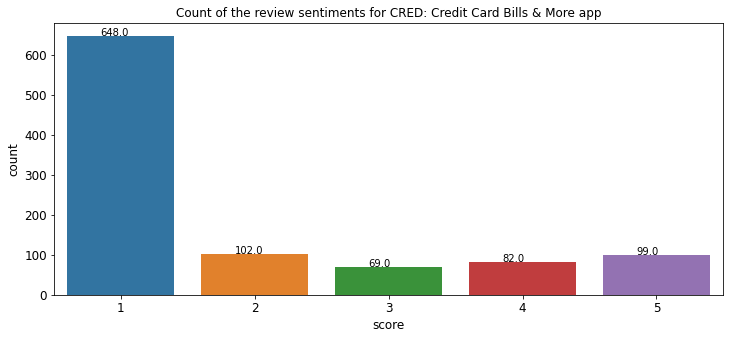

In [149]:
graph(applist[26])

In [150]:
lda(applist[26])

Topic: 0 
Words: 0.021*"point" + 0.019*"thing" + 0.016*"better" + 0.013*"uninstal" + 0.013*"easi" + 0.013*"peopl" + 0.013*"earlier" + 0.012*"shop"


Topic: 1 
Words: 0.021*"user" + 0.015*"applic" + 0.014*"coupon" + 0.013*"need" + 0.013*"mail" + 0.012*"version" + 0.012*"process" + 0.012*"offer"


Topic: 2 
Words: 0.023*"bill" + 0.018*"useless" + 0.016*"pay" + 0.016*"offer" + 0.015*"use" + 0.015*"abl" + 0.014*"resolv" + 0.014*"applic"


Topic: 3 
Words: 0.039*"offer" + 0.030*"cash" + 0.018*"useless" + 0.014*"friend" + 0.013*"love" + 0.013*"problem" + 0.013*"respons" + 0.012*"bill"


Topic: 4 
Words: 0.043*"order" + 0.022*"deliv" + 0.020*"contact" + 0.020*"ticket" + 0.019*"number" + 0.016*"resolv" + 0.015*"rais" + 0.015*"receiv"


Topic: 5 
Words: 0.031*"debit" + 0.029*"work" + 0.018*"respons" + 0.017*"contact" + 0.014*"success" + 0.013*"date" + 0.012*"number" + 0.011*"charg"




### Topics

1. Negative Revew: Easy Transactions but does not work sometimes.(technical) 
2. Negative Review: Offer related issues.(technical)
3. Negative Review:Useless offers.(technical)
4. Negative Review:Notifications are slow(technical)
5. Negative Review: Offer related issues.(technical)
6. Positive review: Good Support Team(non-technical)











## 28)Stripe Dashboard

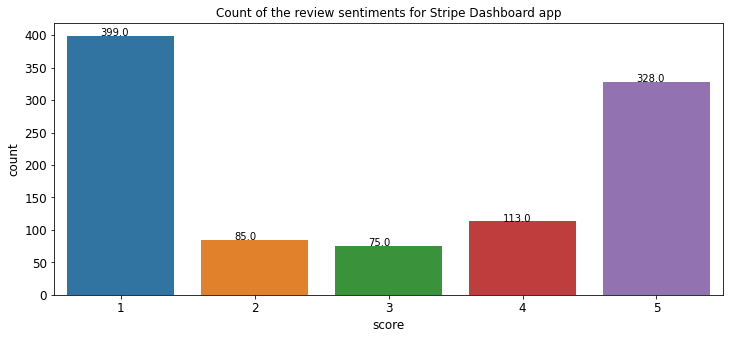

In [151]:
graph(applist[27])

In [152]:
lda(applist[27])

Topic: 0 
Words: 0.028*"like" + 0.026*"featur" + 0.022*"love" + 0.021*"quick" + 0.018*"platform" + 0.017*"track" + 0.017*"day" + 0.015*"option"


Topic: 1 
Words: 0.027*"updat" + 0.025*"email" + 0.019*"phone" + 0.018*"client" + 0.017*"chang" + 0.016*"time" + 0.014*"screen" + 0.013*"go"


Topic: 2 
Words: 0.024*"invoic" + 0.022*"websit" + 0.017*"need" + 0.016*"have" + 0.015*"card" + 0.015*"abl" + 0.012*"provid" + 0.012*"send"


Topic: 3 
Words: 0.027*"day" + 0.021*"take" + 0.021*"time" + 0.019*"wait" + 0.018*"transact" + 0.016*"payout" + 0.015*"week" + 0.014*"refund"


Topic: 4 
Words: 0.037*"better" + 0.024*"paypal" + 0.022*"bank" + 0.018*"check" + 0.016*"love" + 0.015*"process" + 0.014*"fine" + 0.014*"fund"


Topic: 5 
Words: 0.036*"mobil" + 0.025*"login" + 0.021*"function" + 0.021*"authent" + 0.021*"sign" + 0.017*"need" + 0.017*"useless" + 0.015*"like"




### Topics

1. Positive Revew: Fast transactions and help with finance management(technical) 
2. Negative Review: Issues with Updating Information.(technical)
3. Negative Review: Support relate issues(non-technical)
4. Negative Review:Failed transactions and late refunds(technical)
5. Positive Review:Good Experience(technical) 
6. Negative review: Login and Authentication issues(technical)











## 29)Fave - Cashback, Deals, UPI

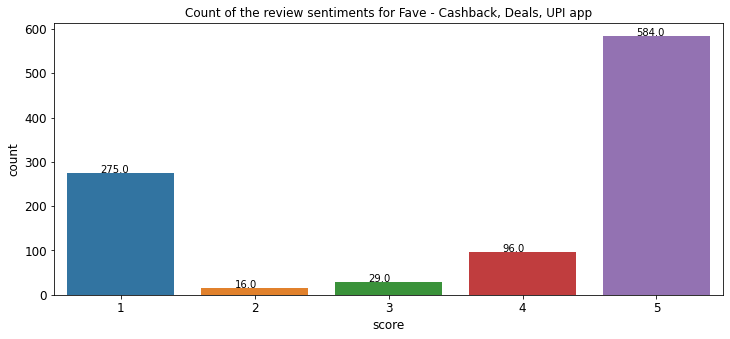

In [161]:
graph(applist[28])

In [162]:
lda(applist[28])

Topic: 0 
Words: 0.102*"awesom" + 0.061*"money" + 0.059*"fake" + 0.054*"great" + 0.044*"love" + 0.040*"user" + 0.036*"send" + 0.035*"open"


Topic: 1 
Words: 0.234*"best" + 0.071*"earn" + 0.059*"offer" + 0.047*"payment" + 0.039*"time" + 0.033*"recommend" + 0.032*"superb" + 0.031*"rupe"


Topic: 2 
Words: 0.106*"fave" + 0.069*"experi" + 0.060*"shop" + 0.042*"account" + 0.039*"super" + 0.035*"nahi" + 0.035*"server" + 0.032*"money"


Topic: 3 
Words: 0.191*"applic" + 0.082*"time" + 0.066*"payment" + 0.062*"work" + 0.044*"offer" + 0.030*"easili" + 0.025*"amaz" + 0.024*"deal"


Topic: 4 
Words: 0.114*"worst" + 0.109*"reward" + 0.080*"give" + 0.069*"cash" + 0.053*"amaz" + 0.051*"instant" + 0.040*"merchant" + 0.034*"work"


Topic: 5 
Words: 0.104*"payment" + 0.088*"receiv" + 0.085*"transact" + 0.068*"easi" + 0.064*"app" + 0.051*"excel" + 0.041*"instant" + 0.035*"problem"




### Topics

1. Positive Revew: Convenient Transactions(technical) 
2. Positive Review: Good offers.(technical)
3. Negative Review: Server down often.(technical)
4. Positive Review:Convenient Transactions(technical) 
5. Positive Review:Good instant transactions but bad rewards (non-technical) 
6. Positive review: Fast Transactions.(technical)











## 30)BHIM Axis Pay:UPI,Online Recharge & Money Transfer

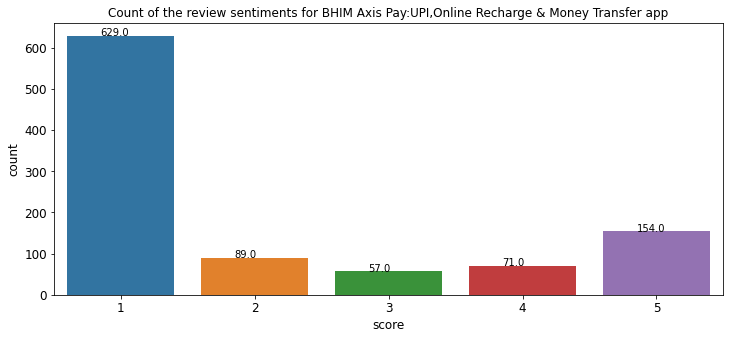

In [163]:
graph(applist[29])

In [164]:
lda(applist[29])

Topic: 0 
Words: 0.028*"payment" + 0.026*"close" + 0.025*"automat" + 0.022*"enter" + 0.020*"option" + 0.019*"app" + 0.019*"like" + 0.019*"password"


Topic: 1 
Words: 0.025*"problem" + 0.024*"fail" + 0.021*"like" + 0.020*"user" + 0.020*"need" + 0.019*"get" + 0.017*"enter" + 0.017*"asap"


Topic: 2 
Words: 0.031*"balanc" + 0.029*"check" + 0.026*"custom" + 0.026*"payment" + 0.023*"crash" + 0.021*"money" + 0.015*"mandat" + 0.015*"day"


Topic: 3 
Words: 0.054*"phone" + 0.036*"ask" + 0.030*"devic" + 0.029*"say" + 0.027*"fine" + 0.022*"root" + 0.021*"activ" + 0.021*"earlier"


Topic: 4 
Words: 0.046*"send" + 0.031*"messag" + 0.031*"data" + 0.025*"verif" + 0.022*"network" + 0.022*"get" + 0.021*"ask" + 0.017*"applic"


Topic: 5 
Words: 0.033*"transfer" + 0.031*"money" + 0.029*"ifsc" + 0.025*"applic" + 0.024*"request" + 0.020*"code" + 0.020*"develop" + 0.019*"payment"




### Topics

1. Negative Revew: Login and Authentication issues(technical) 
2. Negative Review:Payment failed.(technical)
3. Negative Review: Unable to check balance and late transactions.(technical)
4. Negative Review:Often stops working.(technical)
5. Negative Review:Login and authentication issues (non-technical) 
6. Negative review: Payment issues.(technical)









